# Bandit QNN in Car Evaluation dataset

 This algorithm is a QCB framework that allow clients to use greedy policy to interact with environment. It is implemented in car evaluation dataset, in whose scenario the client can get feedback, and use the feedback as part of the new training dataset, to allow them converge in an uncertain environment. 

## Load and Preprocess Car dataset

In [280]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Download latest version
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

data_file = path + '/car_evaluation.csv'

# read data
df = pd.read_csv(data_file, header=None, sep=',')

# save data
data_set = df

# 显示数据的前几行以验证
print(data_set)
print(len(data_set))

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\elikplim\car-evaluation-data-set\versions\1
          0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
...     ...    ...    ...   ...    ...   ...    ...
1723    low    low  5more  more    med   med   good
1724    low    low  5more  more    med  high  vgood
1725    low    low  5more  more    big   low  unacc
1726    low    low  5more  more    big   med   good
1727    low    low  5more  more    big  high  vgood

[1728 rows x 7 columns]
1728


In [281]:
label_encoder = LabelEncoder()
for i in range(7):
    data_set[i] = label_encoder.fit_transform(data_set[i])
#print(data_set[:5])
data_set = np.array(data_set)
print(data_set)

[[3 3 0 ... 2 1 2]
 [3 3 0 ... 2 2 2]
 [3 3 0 ... 2 0 2]
 ...
 [1 1 3 ... 0 1 2]
 [1 1 3 ... 0 2 1]
 [1 1 3 ... 0 0 3]]


      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       1      2
1          3      3      0        0         2       2      2
2          3      3      0        0         2       0      2
3          3      3      0        0         1       1      2
4          3      3      0        0         1       2      2
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      3        2         1       2      1
1724       1      1      3        2         1       0      3
1725       1      1      3        2         0       1      2
1726       1      1      3        2         0       2      1
1727       1      1      3        2         0       0      3

[1728 rows x 7 columns]


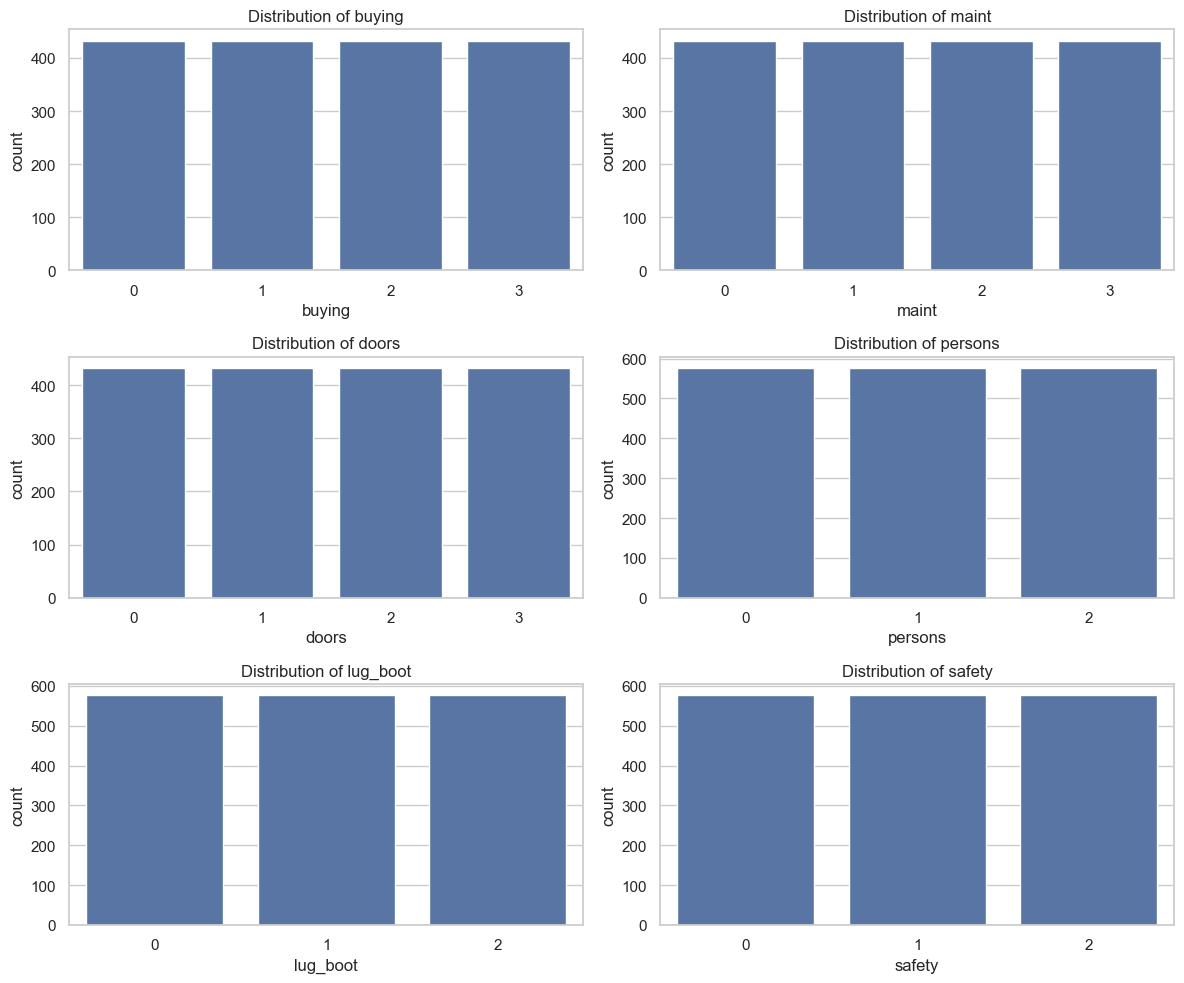

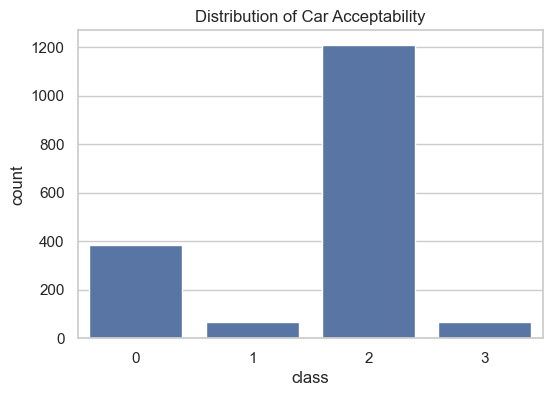

In [488]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 类别分布图
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

df = pd.DataFrame(data_set, columns=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])
print(df)

# 遍历每个特征并绘制条形图
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
for i, feature in enumerate(names):
    ax = axes[i // 2, i % 2]
    sns.countplot(data=df, x=feature, ax=ax)
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="class")
plt.title("Distribution of Car Acceptability")
plt.show()

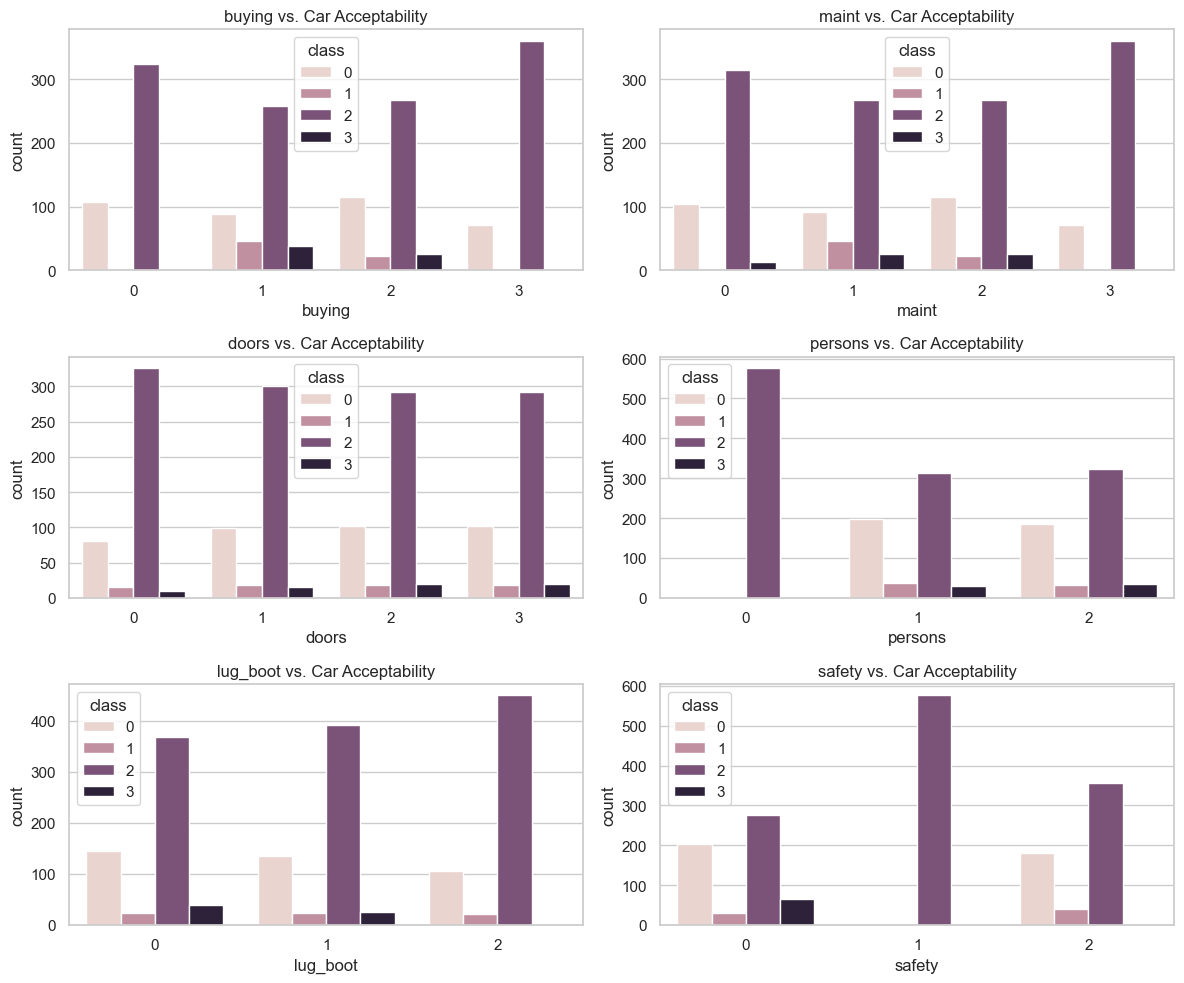

In [486]:
# 设置绘图风格
sns.set(style="whitegrid")

# 类别分布图
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
# 遍历每个特征并绘制条形图
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
for i, feature in enumerate(names):
    ax = axes[i // 2, i % 2]
    sns.countplot(data=df, x=feature, hue="class",ax=ax)
    ax.set_title(f"{feature} vs. Car Acceptability")
plt.tight_layout()
plt.show()


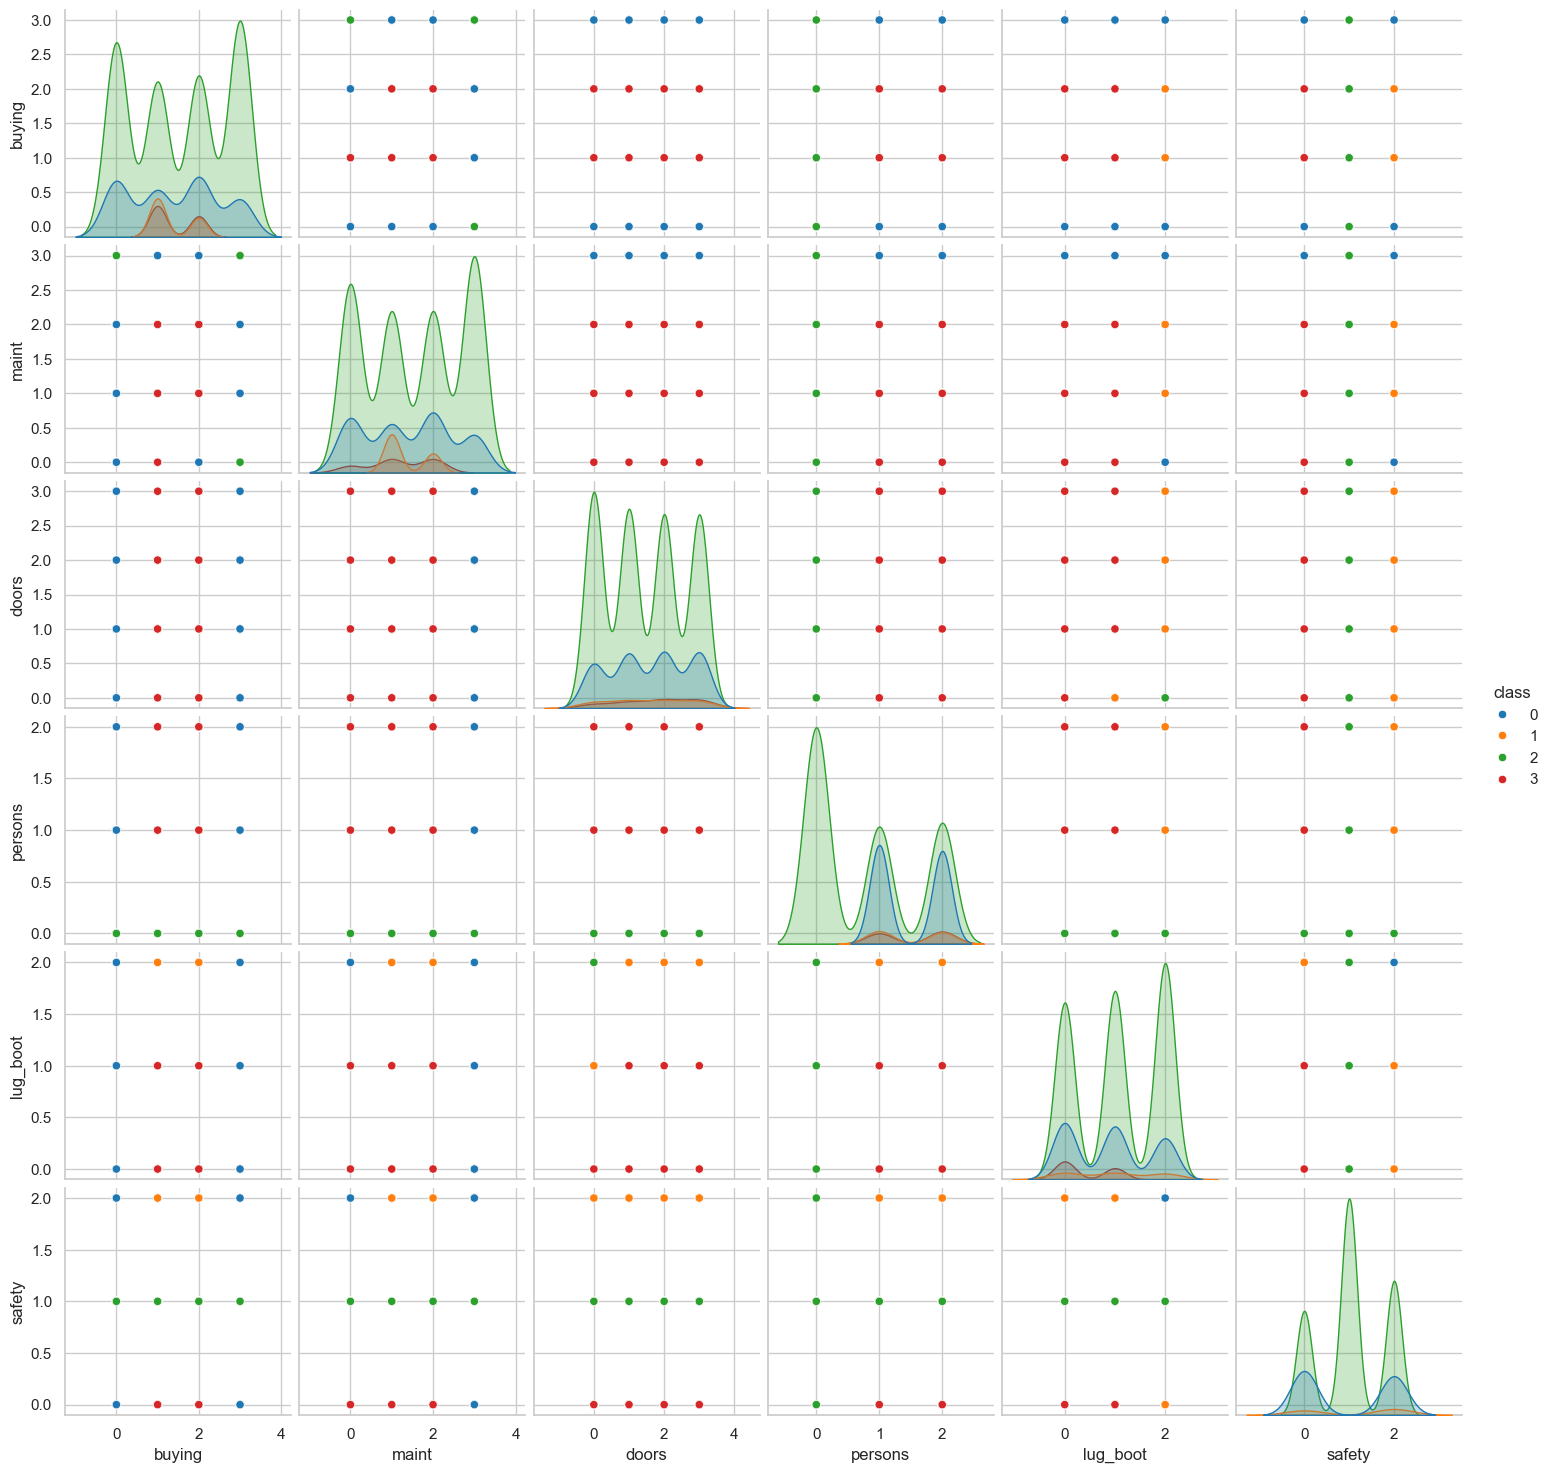

In [487]:
sns.pairplot(df, hue="class", palette="tab10")

In [283]:
np_data_set = []
for i in range(len(data_set)):
    sequence = data_set[i][:6]
    label = data_set[i][6]
    data_point = {'sequence': sequence, 'label': label}
    np_data_set.append(data_point)


print("First 5 samples of encoded data:")
np_data_set

First 5 samples of encoded data:


[{'sequence': array([3, 3, 0, 0, 2, 1]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 2, 2]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 2, 0]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 1, 1]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 1, 2]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 1, 0]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 0, 1]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 0, 2]), 'label': 2},
 {'sequence': array([3, 3, 0, 0, 0, 0]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 2, 1]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 2, 2]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 2, 0]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 1, 1]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 1, 2]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 1, 0]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 0, 1]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 0, 2]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 0, 0]), 'label': 2},
 {'sequence': array([3, 3, 0

## Shuffling Data for Balanced Distribution

In the code segment above, we observe the first 5 samples of the `np_data_set` variable. It's apparent that all of these initial samples have a label of 0. This observation is due to the common dataset structure, where the data is organized such that the first batch of samples belongs to one class (in this case, class 0), followed by another class (class 1), and so on.

However, in the subsequent steps of this code, we'll divide the data into portions for each of our clients, and it's crucial to ensure that each client receives a balanced mix of data from both classes (0 and 1). Therefore, we need to shuffle the `np_data_set` variable.

Shuffling the dataset randomizes the order of samples, guaranteeing that no single client will receive data only from one class. This is essential for a more representative and fair distribution of data among clients.

In [284]:
np.random.shuffle(np_data_set)
print("First 5 samples of encoded shuffled data:")
np_data_set

First 5 samples of encoded shuffled data:


[{'sequence': array([2, 3, 3, 2, 0, 0]), 'label': 0},
 {'sequence': array([1, 1, 0, 0, 1, 2]), 'label': 2},
 {'sequence': array([1, 3, 3, 1, 0, 0]), 'label': 0},
 {'sequence': array([2, 3, 0, 0, 1, 1]), 'label': 2},
 {'sequence': array([2, 1, 2, 1, 1, 2]), 'label': 1},
 {'sequence': array([3, 1, 1, 2, 2, 2]), 'label': 2},
 {'sequence': array([1, 2, 1, 0, 1, 1]), 'label': 2},
 {'sequence': array([2, 1, 3, 0, 2, 0]), 'label': 2},
 {'sequence': array([3, 3, 0, 1, 0, 1]), 'label': 2},
 {'sequence': array([0, 0, 0, 1, 1, 1]), 'label': 2},
 {'sequence': array([2, 1, 1, 0, 1, 0]), 'label': 2},
 {'sequence': array([1, 2, 1, 2, 1, 1]), 'label': 2},
 {'sequence': array([0, 3, 1, 2, 1, 0]), 'label': 2},
 {'sequence': array([1, 1, 3, 1, 2, 1]), 'label': 2},
 {'sequence': array([2, 2, 3, 0, 1, 2]), 'label': 2},
 {'sequence': array([0, 2, 0, 0, 0, 0]), 'label': 2},
 {'sequence': array([3, 3, 3, 1, 1, 0]), 'label': 2},
 {'sequence': array([1, 0, 0, 0, 1, 0]), 'label': 2},
 {'sequence': array([3, 1, 3

## Scaling the Data with Min-Max Scaling

In the code provided, we apply Min-Max scaling to the dataset to normalize the numerical values. This process is valuable for ensuring that the features of the dataset are within a consistent range, typically between 0 and 1.

Here's how the code accomplishes this:
1. We collect the sequences from the `np_data_set` variable and stack them into an array.
2. We create a `MinMaxScaler` object, which will be used to perform the scaling.
3. The scaler is then applied to the sequences using `scaler.fit_transform()`.
4. The scaled sequences are replaced in each data point within the `np_data_set` variable.

As a result, the sequences' values are transformed to a standardized scale, making it easier to work with the data and ensuring that each feature has the same weight in subsequent analyses.

The output displays the first 5 samples of the scaled, encoded, and shuffled data, highlighting how the values are now in the [0, 1] range after the scaling process.

In [285]:
from sklearn.preprocessing import MinMaxScaler

sequences = np.array([item['sequence'] for item in np_data_set])
sequences = np.vstack(sequences)

scaler = MinMaxScaler()

sequences_scaled = scaler.fit_transform(sequences)

for i, item in enumerate(np_data_set):
    item['sequence'] = sequences_scaled[i]

print("First 5 samples of scaled encoded shuffled data:")
np_data_set[:5]

First 5 samples of scaled encoded shuffled data:


[{'sequence': array([0.66666667, 1.        , 1.        , 1.        , 0.        ,
         0.        ]),
  'label': 0},
 {'sequence': array([0.33333333, 0.33333333, 0.        , 0.        , 0.5       ,
         1.        ]),
  'label': 2},
 {'sequence': array([0.33333333, 1.        , 1.        , 0.5       , 0.        ,
         0.        ]),
  'label': 0},
 {'sequence': array([0.66666667, 1.        , 0.        , 0.        , 0.5       ,
         0.5       ]),
  'label': 2},
 {'sequence': array([0.66666667, 0.33333333, 0.66666667, 0.5       , 0.5       ,
         1.        ]),
  'label': 1}]

## Splitting the Dataset and Preparing Test Data

In the previous section, we divided the `np_data_set` variable into two subsets, with 70,000 samples earmarked for training and 5,000 samples reserved for testing. This division is crucial for the development and evaluation of our Quantum Federated Learning model, ensuring that we have separate datasets for these purposes.

Following the split, we proceed to prepare the test data for further analysis and evaluation. We extract the sequences and labels from the testing dataset. This separation is essential as it allows us to analyze the data and labels separately, facilitating model evaluation and performance assessment.

At this point, the test data is organized into two variables:
- `test_sequences`: An array containing the sequences from the test data.
- `test_labels`: An array containing the corresponding labels from the test data.

These variables will be used in subsequent steps to evaluate the model's performance on the testing data.


In [286]:
features = [data_point["sequence"] for data_point in np_data_set]
labels = [data_point["label"] for data_point in np_data_set]
features = np.array(features[:150])
labels = np.array(labels[:150])
print(features[:5])
print(labels[:5])

[[0.66666667 1.         1.         1.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.         0.5        1.        ]
 [0.33333333 1.         1.         0.5        0.         0.        ]
 [0.66666667 1.         0.         0.         0.5        0.5       ]
 [0.66666667 0.33333333 0.66666667 0.5        0.5        1.        ]]
[0 2 0 2 1]


## Training with QNN

Before we train a model, we should split the dataset into two parts: a training dataset and a test dataset. We'll use the former to train the model and the latter to verify how well our models perform on unseen data.

As usual, we'll ask scikit-learn to do the boring job for us. We'll also fix the seed to ensure the results are reproducible.

In [287]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 456
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)
print(train_features[:8], test_features[:8], train_labels[:8], test_labels[:8])
train_set = []
test_set = []
for i in range(len(train_features)):
    train = {'sequence': train_features[i], 'label': train_labels[i]}
    train_set.append(train)
for i in range(len(test_features)):
    test = {'sequence': test_features[i], 'label': test_labels[i]}
    test_set.append(test)

print(train_set)

[[0.         0.         0.         0.5        0.5        0.5       ]
 [0.         0.66666667 1.         0.5        1.         0.        ]
 [0.         0.66666667 0.33333333 1.         0.         0.        ]
 [0.66666667 0.33333333 1.         0.         0.5        0.        ]
 [0.         0.66666667 0.         0.         1.         0.5       ]
 [0.         0.33333333 1.         1.         1.         0.        ]
 [0.33333333 1.         0.         0.         0.         0.        ]
 [1.         0.         0.33333333 1.         1.         0.5       ]] [[0.66666667 0.33333333 0.33333333 0.5        0.5        0.5       ]
 [0.66666667 0.33333333 0.66666667 1.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.         0.5        1.        ]
 [0.         0.         1.         1.         0.         0.5       ]
 [0.33333333 1.         1.         0.5        0.         0.        ]
 [1.         0.         0.         0.5        0.5        0.        ]
 [0.         1.         0.       

Once the data is loaded, we must immediately apply a parameterized quantum circuit. This circuit is a direct analog to the layers in classical neural networks. It has a set of tunable parameters or weights. The weights are optimized such that they minimize an objective function. This objective function characterizes the distance between the predictions and known labeled data. A parameterized quantum circuit is also called a parameterized trial state, variational form, or ansatz. Perhaps, the latter is the most widely used term.

In [288]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

## Use QNN 
design a qnn circuit, which use 2 qubits, 4 inputs and 4 weights

input parameters: ['input[0]', 'input[1]', 'input[2]', 'input[3]', 'input[4]', 'input[5]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]', 'weight[4]', 'weight[5]']


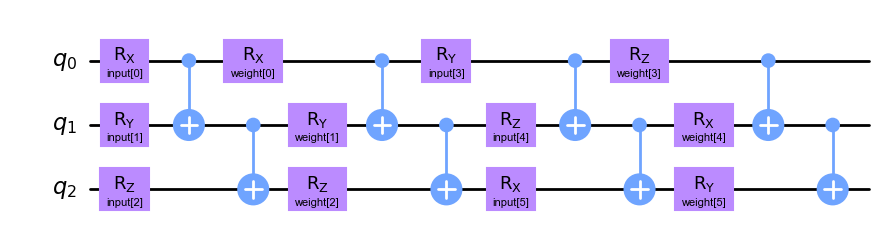

In [334]:
from qiskit.circuit import ParameterVector
from qiskit import QuantumCircuit

inputs = ParameterVector("input", 6)
weights = ParameterVector("weight", 6)
print(f"input parameters: {[str(item) for item in inputs.params]}")
print(f"weight parameters: {[str(item) for item in weights.params]}")

qc = QuantumCircuit(3)
qc.rx(inputs[0], 0)
qc.ry(inputs[1], 1)
qc.rz(inputs[2], 2)

qc.cx(0, 1)
qc.cx(1, 2)

qc.rx(weights[0], 0)
qc.ry(weights[1], 1)
qc.rz(weights[2], 2)

qc.cx(0, 1)
qc.cx(1, 2)

qc.ry(inputs[3], 0)
qc.rz(inputs[4], 1)
qc.rx(inputs[5], 2)

qc.cx(0, 1)
qc.cx(1, 2)

qc.rz(weights[3], 0)
qc.rx(weights[4], 1)
qc.ry(weights[5], 2)

qc.cx(0, 1)
qc.cx(1, 2)


qc.draw("mpl", style="clifford")

Use a callback function to draw a histogram

In [290]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

Define interpret function to map 4 outputs into 3 categories. Instantiate samplerQNN and NeutralNetworkClassifier.

In [291]:
import time
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_algorithms.optimizers import GradientDescent
from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import NeuralNetworkClassifier
from qiskit.primitives import BackendSampler       
from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
import qiskit_aer.noise as noise

## Quantum Noise

In [292]:
backend = AerSimulator()

noise_model = NoiseModel.from_backend(backend)
print(noise_model)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

NoiseModel: Ideal


d:\software\Anaconda\envs\qfcb\lib\site-packages\qiskit_aer\noise\noise_model.py:377: UserWarning: Qiskit backend AerSimulator('aer_simulator') has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


### depolarizing noise model

In [293]:
# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)
# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['rx', 'ry'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)

### Pauli noise model

In [294]:
from qiskit.circuit.library.standard_gates import XGate, YGate
from qiskit.quantum_info.operators import Pauli
x = XGate()
y = YGate()
noise_ops = [(Pauli(x),0.1),(Pauli(y),0.9)]
# Pauli quantum errors
error = noise.pauli_error(noise_ops)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['rx', 'ry'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

backend = AerSimulator(noise_model=noise_model,
                   coupling_map=coupling_map,
                   basis_gates=basis_gates)

In [330]:
import time
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_algorithms.optimizers import GradientDescent
from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import NeuralNetworkClassifier
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder

def custom_interpreter(x):
    if 0 <= x <= 1:
        return 0
    elif 2 <= x <= 3:
        return 1
    elif 4 <= x <= 5:
        return 2
    else:
        return 3
    
output_shape = 4  # 0, 1, 2, 3 one-hot encoding

In [337]:
shots = 100
sampler = Sampler(options={"shots": shots})
optimizer = COBYLA(maxiter=70)
sampler_qnn = SamplerQNN(
    circuit=qc,
    input_params=inputs,
    weight_params=weights,
    interpret=custom_interpreter,
    output_shape=output_shape,
    #sampler=sampler
    #sampler = BackendSampler(backend=backend)
)

qnn = NeuralNetworkClassifier(
    sampler_qnn, 
    loss='squared_error', 
    one_hot=True, 
    optimizer=optimizer, 
    warm_start=True, 
    initial_point=None, 
    callback=callback_graph
    )



C:\Users\user\AppData\Local\Temp\ipykernel_17916\620013844.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler(options={"shots": shots})


## Train QNN without bandit and FL

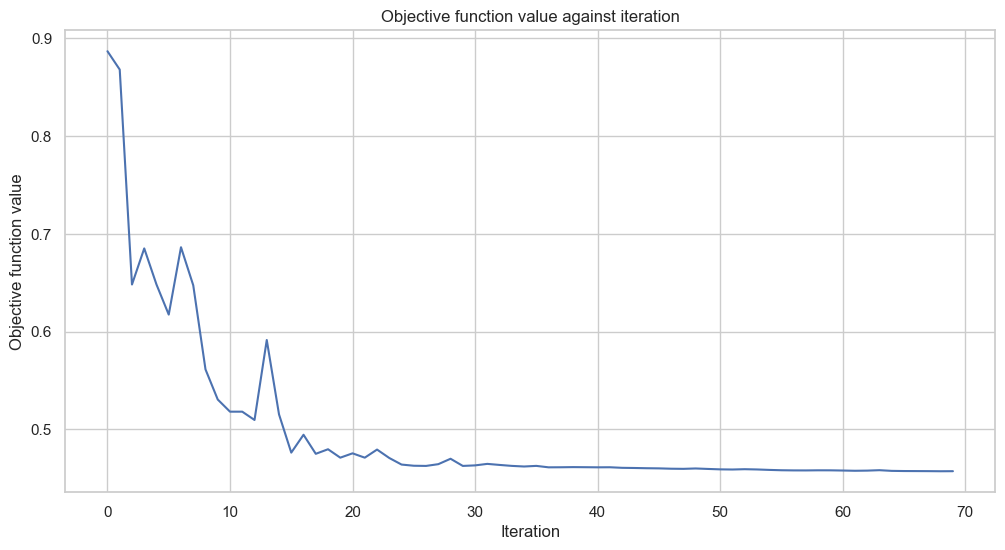

Training time: 26 seconds


In [339]:
from sklearn.metrics import precision_score, recall_score

# clear objective value history
objective_func_vals = []
start = time.time()
qnn.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [340]:
print(qnn.score(test_features, test_labels, sample_weight=None))

train_score_q4 = qnn.score(train_features, train_labels)
test_score_q4 = qnn.score(test_features, test_labels)
pred_labels = qnn.predict(test_features)
assert test_labels.ndim == 1, "test_labels should be a 1D array"
precision = precision_score(test_labels, pred_labels, average=None)
print(f'Precision: {precision}')
recall = recall_score(test_labels, pred_labels, average=None)
print(f'Recall: {recall}')

print(f"Quantum QNN on the training dataset: {train_score_q4:.2f}")
print(f"Quantum QNN on the test dataset:     {test_score_q4:.2f}")

print(qnn.weights)

0.7
Precision: [0.  0.  0.7 0. ]
Recall: [0. 0. 1. 0.]
Quantum QNN on the training dataset: 0.68
Quantum QNN on the test dataset:     0.70
[ 2.93157595 -0.03974064  1.11306534  0.78098272  2.76235259  0.66618264]


d:\software\Anaconda\envs\qfcb\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [299]:
#qnn.weights = [0.55975345, -0.21517516, -0.05249589,  0.19551131,  0.09017355,  0.36659715,-0.03958227,  0.52885646,  0.19975711,  0.54983157]

## Environment Model: generating bandit data
Unlike before, we add an exploration module to this model. In the process of deploying the model, when the user uses the model, the model does not necessarily give the predicted label, but there is a certain probability that the model will give the user other labels. Generate a feedback record of whether the user approved of the tag. This feedback record includes input features, predicted labels, selected labels, and exploration probabilities.

The model starts with initial weights and is already ready to make predictions. Based on the input, it will produce a predicted output. Store the results of this model. During the midway process, the model can be optimized. The bandit algorithm is used to dynamically optimize the QFL model and explore the needs of users. The needs of users themselves will also change.

In [300]:
import random
import collections
import tensorflow as tf

### Epsilon Greedy

In [301]:
def epsilon_greedy_bandit_data(data,model,epsilon):
    train_sequences = [data_point["sequence"] for data_point in data]
    train_labels = [data_point["label"] for data_point in data]
    # Convert the lists to NumPy arrays
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)

    arms_num = 2
    #模型预测值
    pred_action = model.predict(train_sequences)
    # get predicted vector in logits way
    logits = sampler_qnn.forward(train_sequences, model.weights)
    action_list = []
    reward_list = []
    prob_list = []
    arr = [0,1]
    print("Inference Started")
    for i in range(len(pred_action)):
        t =  random.random()
        if t < epsilon:
            remaining_action = [x for x in arr if x != pred_action[i]]
            action = random.choice(remaining_action)
            #print(action)
        else:
            action = pred_action[i]
            #print(action)
        action_list.append(action)

        if action == train_labels[i]:
            reward = 1
        else:
            reward = 0
        reward_list.append(reward)

        action_match_pred = (action_list[i]==pred_action[i])
        per_action_epsilon = epsilon / tf.cast(arms_num, dtype=tf.float32)
        prob = (1 - epsilon + per_action_epsilon) * action_match_pred + (
          1.0 - action_match_pred) * per_action_epsilon
        prob_list.append(prob)
    print("Inference Completed")
    
    action_logits = tf.gather(logits, action_list, axis=1, batch_dims=1).numpy()
    weight_scale = tf.math.minimum(
          1 - epsilon + per_action_epsilon, per_action_epsilon
      )
    new_y = collections.OrderedDict([
          ('label', pred_action),
          ('action', action_list),
          ('reward', reward_list),
          ('prob', prob_list),
          ('logits', action_logits),
          ('weight_scale', weight_scale),
      ])
    bandits_data = collections.OrderedDict(x=train_sequences, y=new_y)
    
    return bandits_data

    
#bandits_data = epsilon_greedy_bandit_data(qnn,0.2)
#print(bandits_data)




### Falcon

In [341]:
def falcon_bandit_data(data,model,mu,gamma):
  train_sequences = [data_point["sequence"] for data_point in data]
  train_labels = [data_point["label"] for data_point in data]
  # Convert the lists to NumPy arrays
  train_sequences = np.array(train_sequences)
  train_labels = np.array(train_labels)

  pred_action = model.predict(train_sequences)
  pred_logits = sampler_qnn.forward(train_sequences, model.weights)
  #print("pred_logits:",pred_logits)
  batch_size = tf.shape(pred_logits)[0]
  num_arms = tf.shape(pred_logits)[1]
  greedy_action = tf.argmax(pred_logits, axis=1, output_type=tf.int32)
  #print("greedy_action:",greedy_action)
  greedy_logits = tf.gather(pred_logits, greedy_action, axis=1, batch_dims=1)
  #print("greedy_logits:",greedy_logits)
  nongreedy_res = tf.expand_dims(greedy_logits, axis=1) - pred_logits
  #print("nongreedy_res:",nongreedy_res)
  nongreedy_prob = 1.0 / (mu + gamma * nongreedy_res)
  #print("nongreedy_prob:",nongreedy_prob)
  greedy_indicator = tf.one_hot(
      greedy_action, depth=num_arms, on_value=True, off_value=False
  )
  #print("greedy_indicator",greedy_indicator)
  nongreedy_prob = tf.where(
      greedy_indicator, tf.zeros_like(pred_logits), nongreedy_prob
  )
  #print("nongreedy_prob",nongreedy_prob)
  # Normalize nongreedy_prob if the sum of probablility is larger than 1 so that
  # it is still a probability distribution to be sampled even if mu and gamma
  # are not properly set.
  nongreedy_prob = nongreedy_prob / tf.math.maximum(
      1.0, tf.math.reduce_sum(nongreedy_prob, axis=1, keepdims=True)
  )
  greedy_prob = 1.0 - tf.math.reduce_sum(nongreedy_prob, axis=1)
  greedy_idx = tf.stack([tf.range(batch_size), greedy_action], axis=1)
  prob = (
      tf.scatter_nd(greedy_idx, greedy_prob, shape=tf.shape(pred_logits))
      + nongreedy_prob
  )
  cumsum_prob = tf.math.cumsum(prob, axis=1)
  cumsum_prob = tf.cast(cumsum_prob, dtype=tf.float32)
  # We can use tf.random.uniform for independent noise on clients, see
  # https://www.tensorflow.org/federated/tutorials/random_noise_generation
  random_val = tf.random.uniform(
      shape=[batch_size], minval=0, maxval=1, dtype=tf.float32
  )
  less_idx = tf.math.less(tf.expand_dims(random_val, axis=1), cumsum_prob)
  # The `action_helper` is constructed so that if the `cumsum_prob` is larger
  # than or equal to `random_val`, the values are the action index; if
  # `cumsum_prob` is smaller, the values are a constant number of the largest
  # possible index of action. When taking the min of `action_helper`,
  # the action where random_val falls in the `cumsum_prob` backet is returned;
  # i.e., the action is sampled based on the falcon `prob`.
  action_helper = tf.where(
      less_idx,
      tf.broadcast_to(
          tf.range(num_arms, dtype=tf.int32), shape=[batch_size, num_arms]
      ),
      (num_arms - 1) * tf.ones(shape=(batch_size, num_arms), dtype=tf.int32),
  )

  # bandit data
  action = tf.math.reduce_min(action_helper, axis=1).numpy()
  print("action:", action)
  action_prob = tf.gather(prob, action, axis=1, batch_dims=1).numpy()
  action_logits = tf.gather(pred_logits, action, axis=1, batch_dims=1).numpy()
  reward_list = []
  for i in range(batch_size):
    if action[i] == train_labels[i]:
        reward = 1
    else:
        reward = 0
    reward_list.append(reward)
  #print("reward:",reward_list)
  weight_scale = 1.0 / (mu + gamma)
  new_y = collections.OrderedDict([
          ('label', pred_action),#predicted action
          ('action', action),#actual action
          ('reward', reward_list),#comparation between correct action(test_label) and actual action
          ('prob', action_prob),
          ('logits', action_logits),
          ('weight_scale', weight_scale),
      ])
  return collections.OrderedDict(x=train_sequences, y=new_y)


#bandits_data = falcon_bandit_data(train_set,qnn,0.5,10)
#print("----------------------------------------------------------------------")
#print(bandits_data['y'])

### Softmax Sampling

In [303]:
def softmax_sampling_bandit_data(data,model,temperature):
    train_sequences = [data_point["sequence"] for data_point in data]
    train_labels = [data_point["label"] for data_point in data]
    # Convert the lists to NumPy arrays
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)

    pred_action = model.predict(train_sequences)
    pred_logits = sampler_qnn.forward(train_sequences, model.weights)
    batch_size = tf.shape(pred_logits)[0]
    num_arms = tf.shape(pred_logits)[1]
    prob = tf.keras.activations.softmax(pred_logits/temperature, axis=-1)
    cumsum_prob = tf.math.cumsum(prob, axis=1)
    cumsum_prob = tf.cast(cumsum_prob, dtype=tf.float32)
    # We can use tf.random.uniform for independent noise on clients, see
    # https://www.tensorflow.org/federated/tutorials/random_noise_generation
    random_val = tf.random.uniform(
        shape=[batch_size], minval=0, maxval=1, dtype=tf.float32
    )
    less_idx = tf.math.less(tf.expand_dims(random_val, axis=1), cumsum_prob)
    # The `action_helper` is constructed so that if the `cumsum_prob` is larger
    # than or equal to `random_val`, the values are the action index; if
    # `cumsum_prob` is smaller, the values are a constant number of the largest
    # possible index of action. When taking the min of `action_helper`,
    # the action where random_val falls in the `cumsum_prob` backet is returned;
    # i.e., the action is sampled based on the softmax `prob`.
    action_helper = tf.where(
        less_idx,
        tf.broadcast_to(
            tf.range(num_arms, dtype=tf.int32), shape=[batch_size, num_arms]
        ),
        (num_arms - 1) * tf.ones(shape=(batch_size, num_arms), dtype=tf.int32),
    )
    action = tf.math.reduce_min(action_helper, axis=1).numpy()
    print("action:", action)
    action_prob = tf.gather(prob, action, axis=1, batch_dims=1).numpy()
    action_logits = tf.gather(pred_logits, action, axis=1, batch_dims=1).numpy()
    reward_list = []
    for i in range(batch_size):
        if action[i] == train_labels[i]:
            reward = 1
        else:
            reward = 0
        reward_list.append(reward)
    #print("reward:",reward_list)
    weight_scale = 1.0 
    new_y = collections.OrderedDict([
          ('label', pred_action),#predicted action
          ('action', action),#actual action
          ('reward', reward_list),#comparation between correct action(test_label) and actual action
          ('prob', action_prob),
          ('logits', action_logits),
          ('weight_scale', weight_scale),
      ])
    return collections.OrderedDict(x=train_sequences, y=new_y)


#bandits_data = softmax_sampling_bandit_data(qnn,0.05)
#print("----------------------------------------------------------------------")
#print(bandits_data)


## Implementing the Bandit in QNN
Use bandit data to train the QNN. Mainly change the loss function.

### Loss function with weights

In [304]:

from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss,L2Loss,Loss
from qiskit_machine_learning.exceptions import QiskitMachineLearningError
class L1Loss_w():
    r"""
    This class computes the L1 loss (i.e. absolute error) for each sample as:

    .. math::

        \text{L1Loss}(predict, target) = \sum_{i=0}^{N_{\text{elements}}} \left| predict_i -
        target_i \right|.
    """
    def __call__(self, predict: np.ndarray, target: np.ndarray,weights: np.ndarray = None) -> np.ndarray:
        """
        This method calls the ``evaluate`` method. This is a convenient method to compute loss.
        """
        return self.evaluate(predict, target)

    def evaluate(self, predict: np.ndarray, target: np.ndarray,weights: np.ndarray = None) -> np.ndarray:
        self._validate_shapes(predict, target)
        if weights is None:
            if len(predict.shape) <= 1:
                return np.abs(predict - target)
            else:
                return np.linalg.norm(predict - target, ord=1, axis=tuple(range(1, len(predict.shape))))
        else:
            if len(predict.shape) <= 1:
                return np.abs(predict - target)*weights
            else:
                return np.linalg.norm(predict - target, ord=1, axis=tuple(range(1, len(predict.shape))))*weights

    def gradient(self, predict: np.ndarray, target: np.ndarray) -> np.ndarray:
        self._validate_shapes(predict, target)

        return np.sign(predict - target)
    @staticmethod
    def _validate_shapes(predict: np.ndarray, target: np.ndarray) -> None:
        """
        Validates that shapes of both parameters are identical.

        Args:
            predict: an array of predicted values using the model
            target: an array of the true values

        Raises:
            QiskitMachineLearningError: shapes of predict and target do not match.
        """

        if predict.shape != target.shape:
            raise QiskitMachineLearningError(
                f"Shapes don't match, predict: {predict.shape}, target: {target.shape}!"
            )

In [305]:
class L2Loss_w():
    r"""
    This class computes the L2 loss (i.e. squared error) for each sample as:

    .. math::

        \text{L2Loss}(predict, target) = \sum_{i=0}^{N_{\text{elements}}} (predict_i - target_i)^2.

    """
    def __call__(self, predict: np.ndarray, target: np.ndarray, weights: np.ndarray = None) -> np.ndarray:
        """
        This method calls the ``evaluate`` method. This is a convenient method to compute loss.
        """
        return self.evaluate(predict, target, weights)
    def evaluate(self, predict: np.ndarray, target: np.ndarray, weights: np.ndarray = None) -> np.ndarray:
        self._validate_shapes(predict, target)
        if weights is None:
            if len(predict.shape) <= 1:
                return (predict - target) ** 2
            else:
                return np.linalg.norm(predict - target, axis=tuple(range(1, len(predict.shape)))) ** 2
        else:
            if len(predict.shape) <= 1:
                return weights*(predict - target) ** 2 
            else:
                return weights*np.linalg.norm(predict - target, axis=tuple(range(1, len(predict.shape)))) ** 2 

    def gradient(self, predict: np.ndarray, target: np.ndarray) -> np.ndarray:
        self._validate_shapes(predict, target)

        return 2 * (predict - target)
    @staticmethod
    def _validate_shapes(predict: np.ndarray, target: np.ndarray) -> None:
        """
        Validates that shapes of both parameters are identical.

        Args:
            predict: an array of predicted values using the model
            target: an array of the true values

        Raises:
            QiskitMachineLearningError: shapes of predict and target do not match.
        """

        if predict.shape != target.shape:
            raise QiskitMachineLearningError(
                f"Shapes don't match, predict: {predict.shape}, target: {target.shape}!"
            )

### Bandit Process

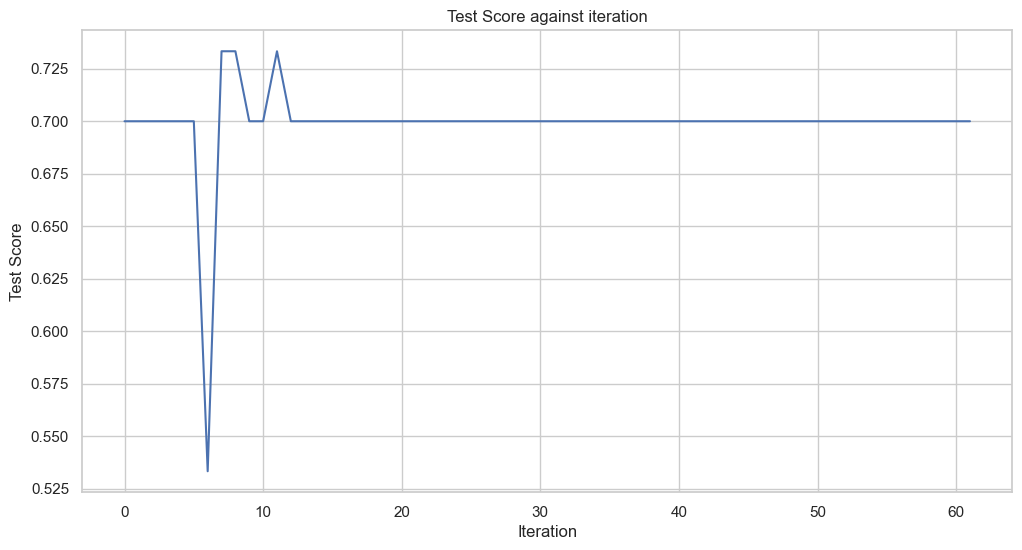

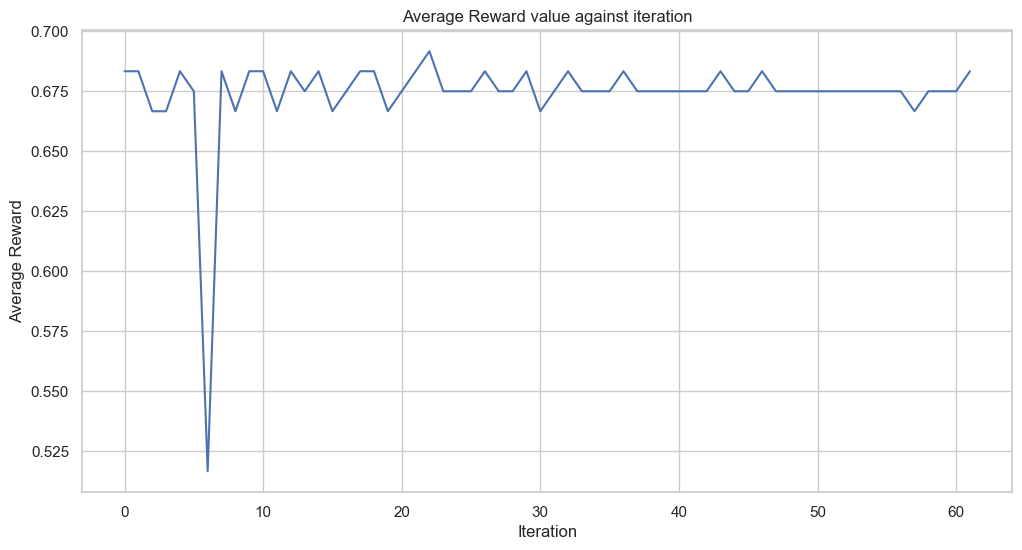

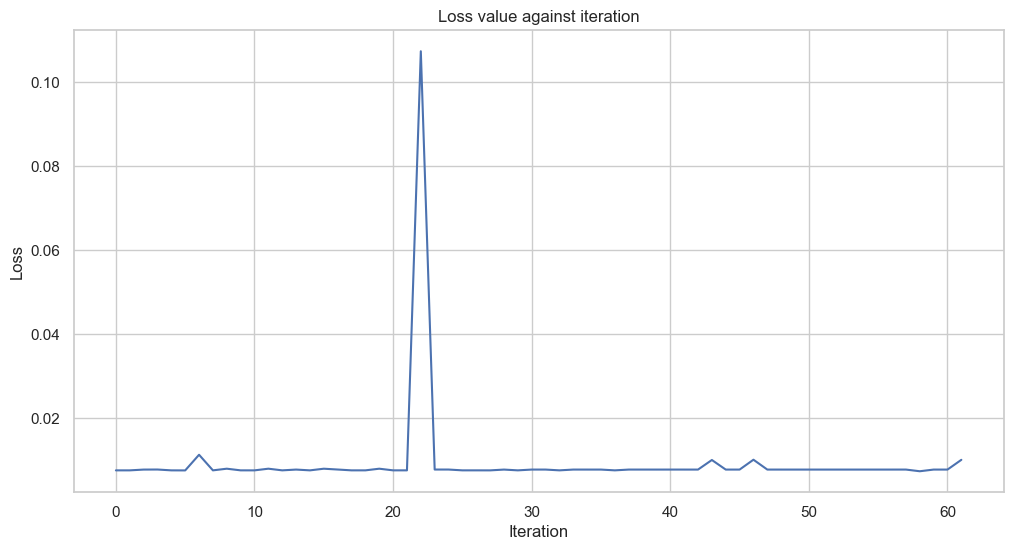

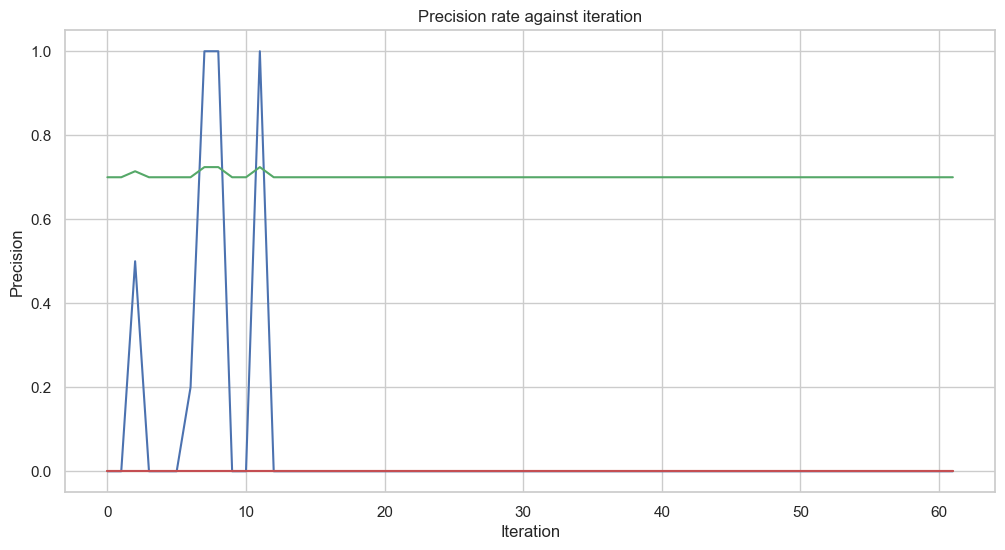

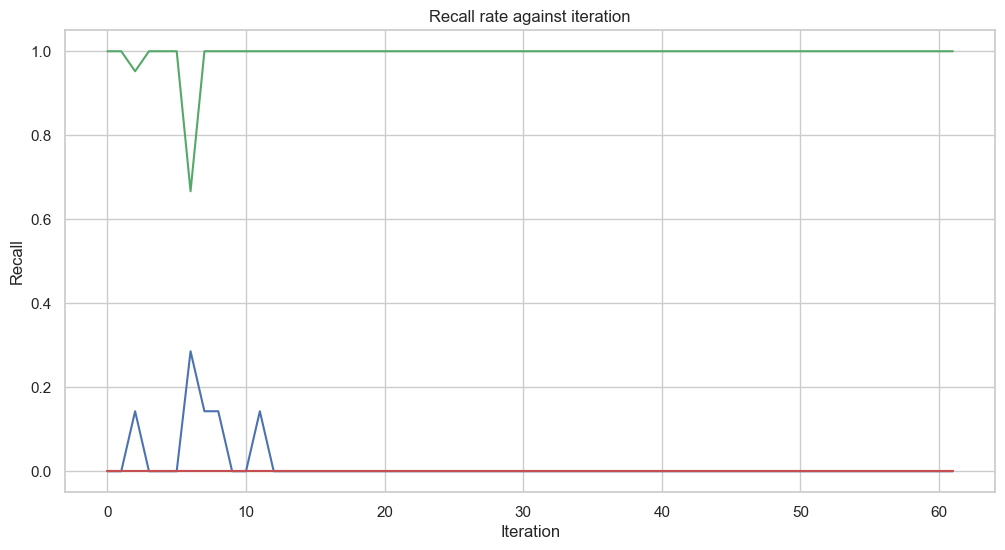

0.01007791199160533


In [343]:
import time
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_algorithms.optimizers import GradientDescent
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import NeuralNetworkClassifier
import numpy as np
scoreList = []
rewardList = []
lossList = []
precisionList = []
recallList = []
def callback_bandit(score,reward,loss,precision,recall):
    clear_output(wait=True)
    scoreList.append(score)
    plt.title("Test Score against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Test Score")
    plt.plot(range(len(scoreList)), scoreList)
    plt.show()

    rewardList.append(reward)
    plt.title("Average Reward value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Average Reward")
    plt.plot(range(len(rewardList)), rewardList)
    plt.show()

    lossList.append(loss)
    plt.title("Loss value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.plot(range(len(lossList)), lossList)
    plt.show()

    precisionList.append(precision)
    plt.title("Precision rate against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Precision")
    plt.plot(range(len(precisionList)), precisionList)
    plt.show()

    recallList.append(recall)
    plt.title("Recall rate against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Recall")
    plt.plot(range(len(recallList)), recallList)
    plt.show()

def banditLoss(weights):
    qnn.fit_result.x = weights
    # epsilon greedy
    #bandits_data = epsilon_greedy_bandit_data(train_set,qnn,0.1)
    # falcon
    bandits_data = falcon_bandit_data(train_set,qnn,12,5000)
    # softmax sampling
    #bandits_data = softmax_sampling_bandit_data(train_set,qnn,0.05)
    
    logits = np.array(bandits_data['y']['prob'])
    reward = np.array(bandits_data['y']['reward'])
    sum_reward=float(sum(reward))
    prob = np.array(bandits_data['y']['prob'])
    weight_scale = np.array(bandits_data['y']['weight_scale'])
    sample_weights =  weight_scale / prob
    #label = np.array(bandits_data['y']['label'])

    #cross entropy loss
    #loss_function = CrossEntropyLoss()
    #loss = loss_function(logits, reward, sample_weights)
    #loss_item = float(np.squeeze(loss))
    #print("Loss:", loss_item)

    #squared error
    loss_function = L2Loss_w()
    loss = loss_function(logits, reward,sample_weights)
    loss_item = sum(loss)
    #print("Loss:", loss_item)

    #absolute error
    #loss_function = L1Loss_w()
    #loss = loss_function(logits,reward,sample_weights)
    #loss_item = sum(loss)
    print("Loss_5:", loss_item)
    print("logits:",logits)
    print("reward_avg:",sum(reward)/len(reward))
    
    print("Score:", qnn.score(test_features, test_labels))
    print("sum_reward:",sum_reward)
   
    score = qnn.score(test_features, test_labels)
    pred_labels = qnn.predict(test_features)
    precision = precision_score(test_labels, pred_labels,average=None)
    print(f'Precision: {precision}')
    recall = recall_score(test_labels, pred_labels,average=None)
    print(f'Recall: {recall}')
    avg_reward = sum_reward/len(reward)
    callback_bandit(score,avg_reward,loss_item,precision,recall)
    print(loss_item)
    return loss_item

#optimizer = GradientDescent(maxiter=100, learning_rate=0.01)
optimizer = COBYLA(maxiter=100)
fit_result = optimizer.minimize(fun=banditLoss, x0=qnn.weights)

qnn.fit_result.x = fit_result.x


In [480]:
import statistics
pred_labels = qnn.predict(test_features)
precision = precision_score(test_labels, pred_labels,average=None)
print(f'Precision: {precision}')
recall = recall_score(test_labels, pred_labels,average=None)
print(f'Recall: {recall}')
for i in range(len(precision)):
    values = [precision[i],recall[i]]
    h_mean = statistics.harmonic_mean(values)
    print(f'Harmonic Mean(F1){i}: {h_mean}')
bandits_data = falcon_bandit_data(train_set,qnn,100,60)
reward = np.array(bandits_data['y']['reward'])
sum_reward=float(sum(reward))
avg_reward=sum_reward/len(reward)
#print(np.array(bandits_data['y']))
print(f'Average Reward: {avg_reward}')

d:\software\Anaconda\envs\qfcb\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\software\Anaconda\envs\qfcb\lib\statistics.py:406: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(1 / x for x in _fail_neg(data, errmsg))


Precision: [0.  0.  0.7 0. ]
Recall: [0. 0. 1. 0.]
Harmonic Mean(F1)0: 0.0
Harmonic Mean(F1)1: 0.0
Harmonic Mean(F1)2: 0.8235294117647058
Harmonic Mean(F1)3: 0.0
action: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
Average Reward: 0.65


In [214]:
print(qnn.score(test_features, test_labels, sample_weight=None))

train_score_q4 = qnn.score(train_features, train_labels)
test_score_q4 = qnn.score(test_features, test_labels)

print(f"Quantum QNN on the training dataset: {train_score_q4:.2f}")
print(f"Quantum QNN on the test dataset:     {test_score_q4:.2f}")

print(qnn.weights)

0.6333333333333333
Quantum QNN on the training dataset: 0.69
Quantum QNN on the test dataset:     0.63
[ 5.15360682  1.72543998  0.50519364 -0.02624676  3.00168219  2.10551088
  3.08631302  0.44559802  1.65740701  1.14729566 -0.39808094  0.10399011]
